<a href="https://colab.research.google.com/github/martin-quinlan/data-science-projects/blob/FoodHub-Project/Final_MQ_FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
#mount Google Drive and import data from there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the CSV file from Google Drive
df = pd.read_csv("/content/drive/MyDrive/Applied Data Science Program/Main Modules/Foundations - Python and Statistics/Week 2 - Foundations - Statistics/FoodHub Project/foodhub_order.csv")
# returns the first 5 rows
df.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


# Observations:
*   The DataFrame has 9 columns as mentioned in the Data Dictionary.
*   Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Defining the dimensions of the dataset
print("Rows and Columns:",df.shape)

Rows and Columns: (1898, 9)


#### Observations:


*   Representing the dimensions of the dataset.
*   The dataset has 1898 rows and 9 columns.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


- The dataset has 1898 rows and 9 columns
- Data types:
  - `order_id`, `customer_id`, `food_preparation_time`, `delivery_time`: type `int64`
  - `restaurant_name`, `cuisine_type`, `day_of_the_week`, `rating`: type `object`
  - `cost_of_the_order`: type `float64`
- There are no null values in any column.
- The memory usage of the dataframe 133.6+ KB (not a huge dataset)




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Checking for any missing values
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:

- Per `print(df.isnull().sum())`, there are no missing / null values





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
df.describe().T #will transpose this to make it easier to read.

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [9]:
# Order_id being displayed in scientific notation. For aesthetics, will set the format.
pd.set_option('display.float_format', '{:.0f}'.format)

# Describe again
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898,1477496,548,1476547,1477021,1477496,1477970,1478444
customer_id,1898,171168,113698,1311,77788,128600,270525,405334
cost_of_the_order,1898,16,7,4,12,14,22,35
food_preparation_time,1898,27,5,20,23,27,31,35
delivery_time,1898,24,5,15,20,25,28,33


#### Observations:
`food_preparation_time`:
This has a small range and very low standard deviation, suggesting a consistent preparation time generally around 25 minutes.
- `food_preparation_time` min: 20.00 minutes.
- `food_preparation_time` avg: 27.00 minutes.
- `food_preparation_time` max: 35.00 minutes.
- `order_id` and `customer_id` can be treated as unique identifiers. Within the context of the above table, they provide no real statistical value (example: doesn't really matter what the median of `order_id` is).







In [10]:
#Let's have a look at the non-numeric data
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
- Shows number of unique values within each categorical column
- Displays the most frequent value (top) and its frequency (freq) for each categorical column
 - Can indicate dominant categories
- For `rating`, we see `Not given` as the most frequent value, which could suggest a need to encourage more ratings or, a need to review if there any potential issues with how this data is collected (i.e. are there systemic issues?).
- The `day_of_the_week` column shows a preference for weekend orders
- `restaurant_name` and `cuisine_type` shows the wide variety of options available



### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Check for occurrences of "Not given" in the Dataset
not_given_ct = (df == "Not given").sum().sum() # not_given_ct = not given count
# And print
print(f"'Not given' appears {not_given_ct} times in the Dataset. These can be treated as orders not rated.")

'Not given' appears 736 times in the Dataset. These can be treated as orders not rated.


In [12]:
# Calculate percentage of 'Not Given' relative to other ratings - for context
def calculate_rt_pct(df):
    # Count occurrences of each rating
    rating_ct = df['rating'].value_counts()

    # Calculate % of each rating
    total_rt = rating_ct.sum()
    rating_pct = (rating_ct / total_rt) * 100

    # Create a DataFrame with 'rating' as index and 'percentage' as column
    result_df = pd.DataFrame({'percentage': rating_pct}).round(2)

    return result_df

# Calculate and print % of each rating
rating_pct = calculate_rt_pct(df)
print(rating_pct)

           percentage
rating               
Not given          39
5                  31
4                  20
3                  10


#### Observations:
- There are 736 orders in the dataset that are not rated. This is described as 'Not Given' in the ratings column.
- This equates to 39% of all orders in the dataset (which is the majority of orders).
- It would be innaccurate to replace the 'Not Given' value with a zero value as this would skew further analysis.
* It is likely worthwhile trying to determine whether there is any specific correlation between a 'not given' rating and other data parameters within the dataset.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [14]:
# Setting a style for better-looking plots
# Provides uniformity to the aesthetics of plots throughout the notebook (essential if presenting to peers / stakeholders in the business).
plt.style.use('seaborn')

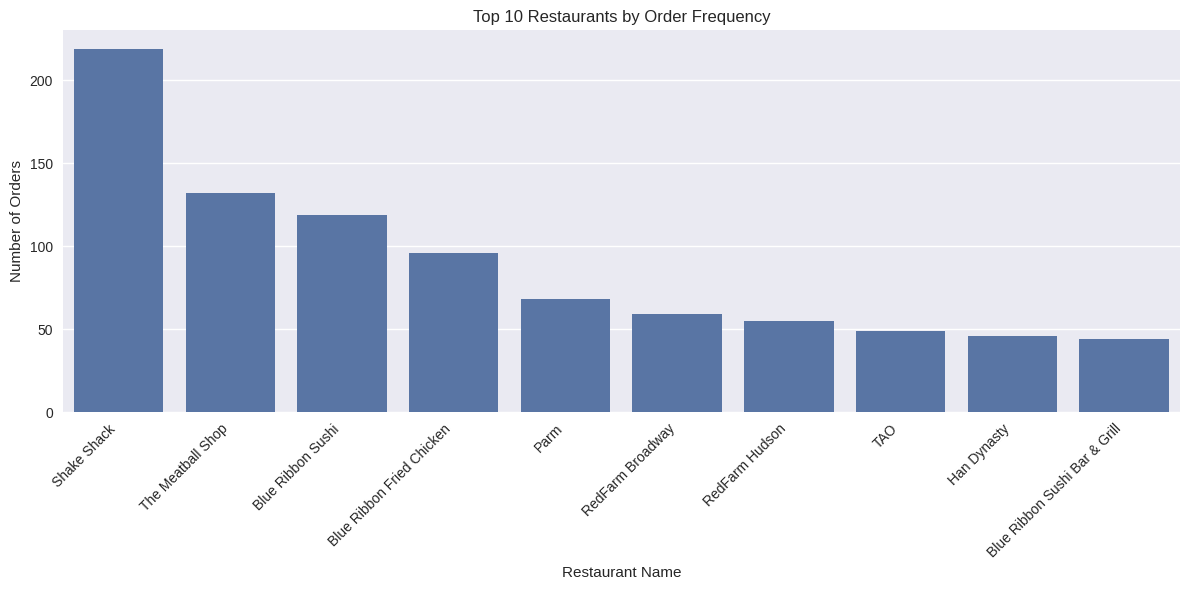

In [15]:
# Restaurant Name Distribution
plt.figure(figsize=(12, 6)) # Create a new figure with specified size (width: 12 inches, height: 6 inches)
top_10_restaurants = df['restaurant_name'].value_counts().nlargest(10) # Count the occurrences of each restaurant name and select the 10 restaurants with the highest order counts
sns.barplot(x=top_10_restaurants.index, y=top_10_restaurants.values) # Create a bar plot using seaborn.
plt.title('Top 10 Restaurants by Order Frequency') # Set plot title
plt.xlabel('Restaurant Name') # x-axis label
plt.ylabel('Number of Orders') # y-axix label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels by 45 degrees and align to the right to improve readability
plt.tight_layout() # Adjust the layout to prevent cutting off labels
plt.show() # Display the plot
plt.close()

# Observations
- Shake Shack is the most popular restaurant, followed by Blue Ribbon Fried Chicken and The Meatball Shop
- There's a notable drop-off after the top 3-4 restaurants
- The top 10 restaurants account for a large proportion of all orders

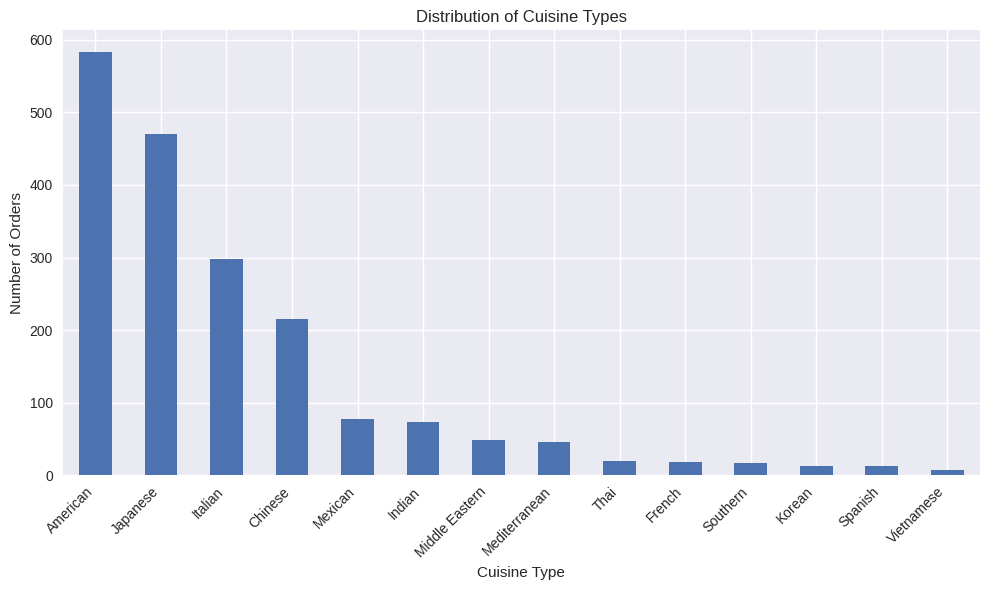

In [16]:
# Cuisine Type Distribution
plt.figure(figsize=(10, 6))  # Create a new figure with size 10x6 inches
df['cuisine_type'].value_counts().plot(kind='bar')  # Count occurrences of each cuisine type and plot as a bar chart
plt.title('Distribution of Cuisine Types')  # Set the title of the plot
plt.xlabel('Cuisine Type')  # x-axis label
plt.ylabel('Number of Orders')  # y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees for readability
plt.tight_layout()  # Adjust the plot layout to prevent cutoff of labels
plt.show()  # Display the plot

# Observations
- American cuisine is the most popular, followed by Japanese and Italian
- There's a long tail of less common cuisine types
- The distribuion is skewed to the right
- The top 3-4 cuisine types are the most dominant in the market

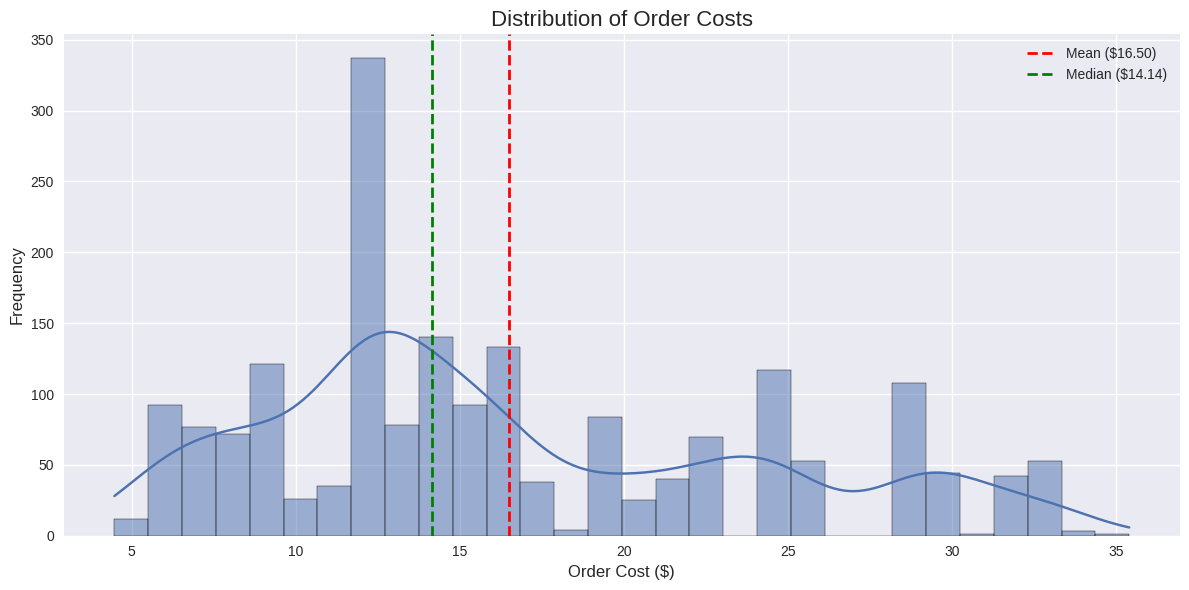

In [17]:
# Order Cost Distribution
plt.figure(figsize=(12, 6))  # Create a new figure with size 12x6 inches
sns.histplot(df['cost_of_the_order'], kde=True, bins=30)  # Create a histogram with KDE of order costs
plt.title('Distribution of Order Costs', fontsize=16)  # Set title with larger font
plt.xlabel('Order Cost ($)', fontsize=12)  # x-axis label
plt.ylabel('Frequency', fontsize=12)  # y-axis label

# Calculate mean and median of order costs
mean_cost = df['cost_of_the_order'].mean()
median_cost = df['cost_of_the_order'].median()

# Add vertical lines for mean and median
plt.axvline(mean_cost, color='red', linestyle='dashed', linewidth=2, label=f'Mean (${mean_cost:.2f})')
plt.axvline(median_cost, color='green', linestyle='dashed', linewidth=2, label=f'Median (${median_cost:.2f})')

plt.legend(fontsize=10)  # Add a legend
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Observations
- The distribution of order costs is right-skewed
- Most orders fall in the \$10 to \$20 range
- The mean (red line) is visibly higher than the median (green line), indication the presence of some high-value outliers
- These outliers are pulling the mean higher than the median
- The median might be a better representation of the "typical" order cost
- There's a long tail to the right, representing expensive orders that are relatively rare

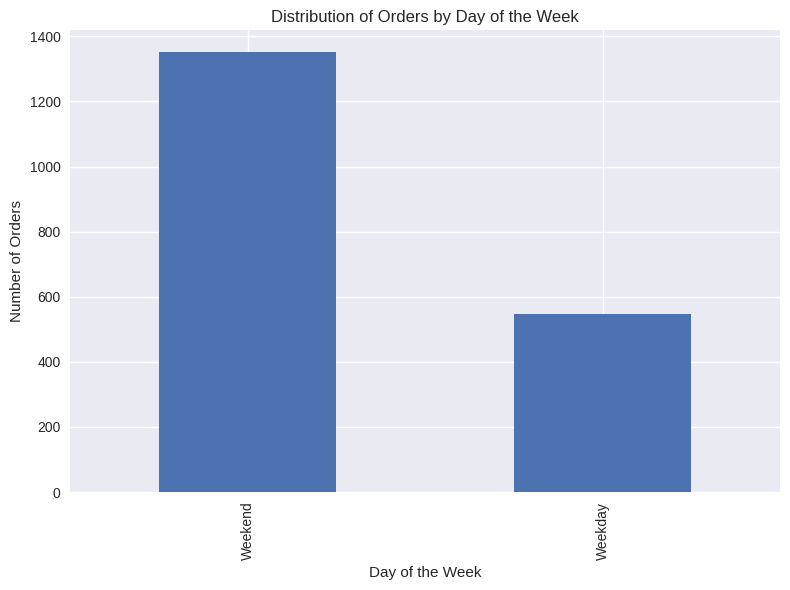

In [18]:
# Day of the Week Distribution
plt.figure(figsize=(8, 6))  # Create a new figure with size 8x6 inches
df['day_of_the_week'].value_counts().plot(kind='bar')  # Count and plot orders by day of the week
plt.title('Distribution of Orders by Day of the Week')  # Set title
plt.xlabel('Day of the Week')  # x-axis label
plt.ylabel('Number of Orders')  # y-axis label
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

###Observations
- There's a positive skew in the ratings, with no ratings below 3 stars
- There's a clear preference for ordering on weekends
- Weekend orders are about twice as common as weekday orders


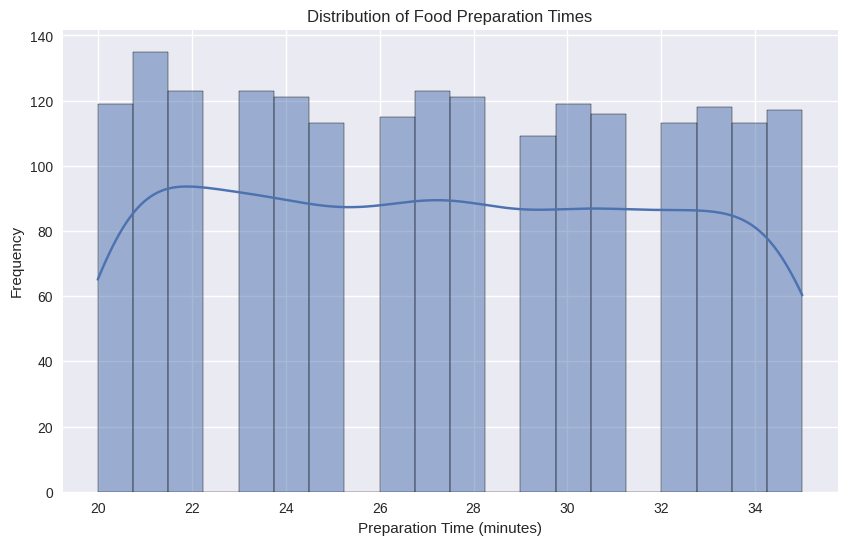

In [19]:
# Food Preparation Time Distribution
plt.figure(figsize=(10, 6)) # Create a new figure with size 10x6 inches
sns.histplot(df['food_preparation_time'], kde=True, bins=20)  # Create histogram of food preparation times
plt.title('Distribution of Food Preparation Times')  # Set title
plt.xlabel('Preparation Time (minutes)')  # x-axis label
plt.ylabel('Frequency')  # y-axis label
plt.show()  # Display the plot

# Observations
- Food preparation times are approximately normally distributed
- Most preparation times fall between 20-35 minutes
- The peak is around 27-28 minutes

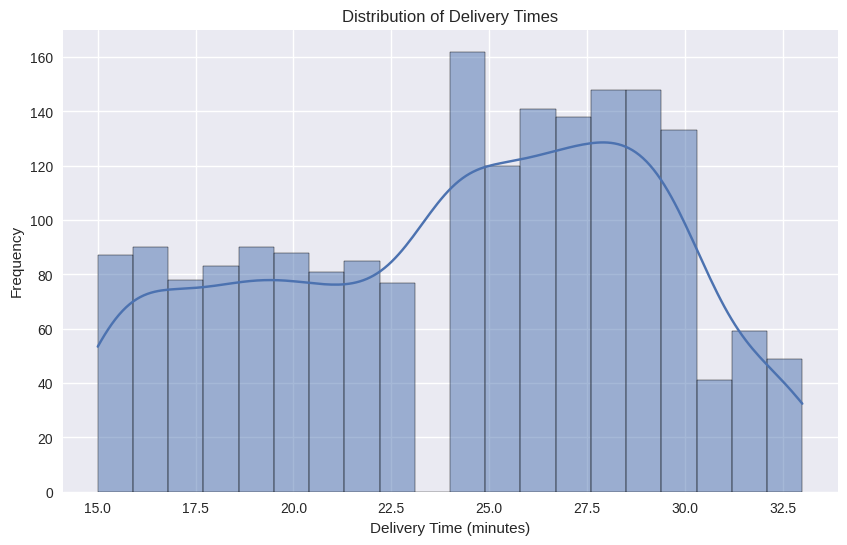

In [20]:
# Delivery Time Distribution
plt.figure(figsize=(10, 6))  # Create a new figure with size 10x6 inches
sns.histplot(df['delivery_time'], kde=True, bins=20)  # Create histogram of delivery times (with KDE plotted also)
plt.title('Distribution of Delivery Times')  # Set title
plt.xlabel('Delivery Time (minutes)')  # x-axis label
plt.ylabel('Frequency')  # y-axis label
plt.show()  # Display the plot

# Observations
- Delivery times are approximately normally distributed
- Most deliveries take between 15-33 minutes
- The peak is around 24-25 minutes

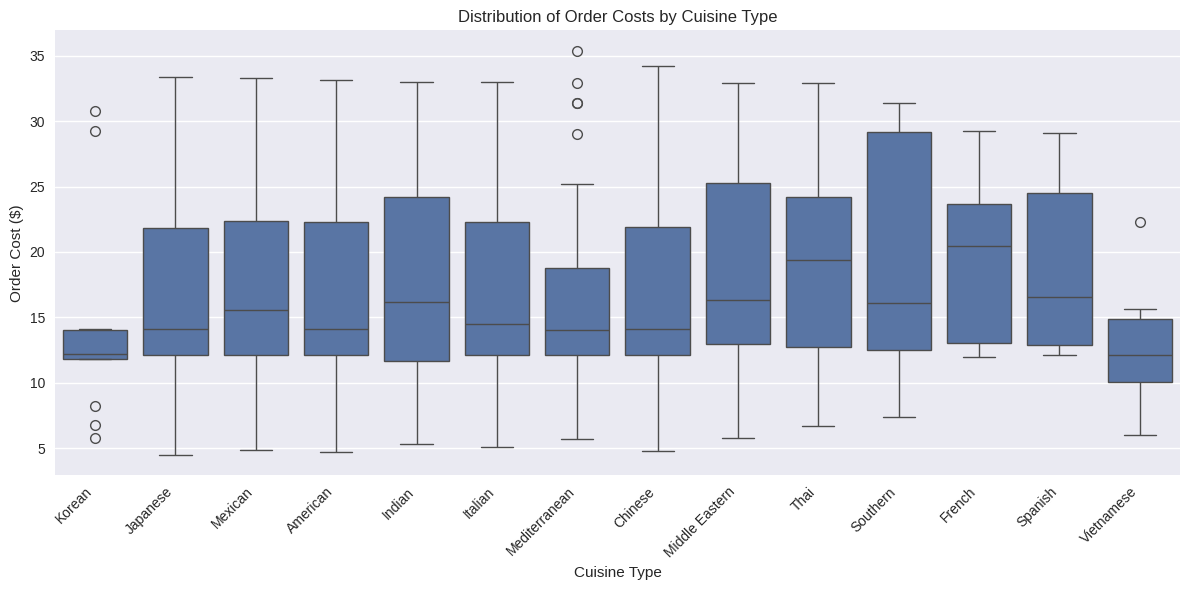

In [21]:
# Boxplot of Order Cost by Cuisine Type
plt.figure(figsize=(12, 6))  # Create a new figure with size 12x6 inches
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)  # Create boxplot with 'cuisine_type' on the x-axis and 'cost_of_the_order' on the y-axis
plt.title('Distribution of Order Costs by Cuisine Type')  # Set title
plt.xlabel('Cuisine Type')  # x-axis label
plt.ylabel('Order Cost ($)')  # y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees for better readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Observations
- There's significant variation in order costs across cuisine types
- Some cuisines (e.g., Thai, French) tend to have higher median costs
- American cuisine is the most popular (noted previously). Despite this, a relatively low median cost can be observed
- Several cuisine types have several high-cost outliers

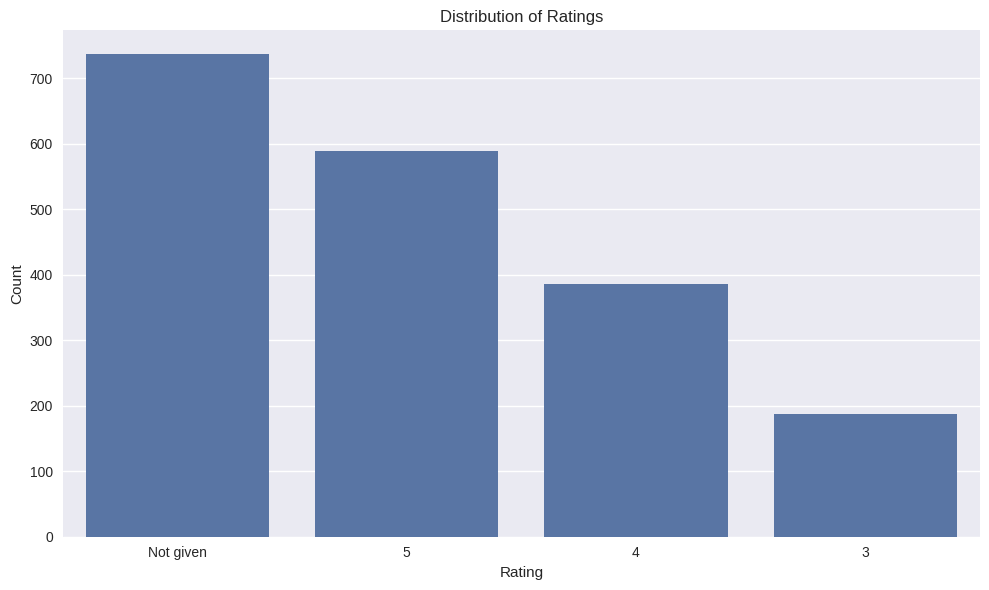

           percentage
rating               
Not given          39
5                  31
4                  20
3                  10


In [22]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))  # Create a new figure size 10x6 inches
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)  # Create count plot of ratings - x-axis is 'rating' and y-axis is value counts
plt.title('Distribution of Ratings')  # Set title
plt.xlabel('Rating')  # x-axis label
plt.ylabel('Count')  # y-axis label
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Print rating_pct (created earlier in the notebook)
print(rating_pct)


# Observations
- Most common rating: Not given
 - Noted earlier in the notebook to be ~39%
 - `rating_pct` printed to show this context
- The highest numerical rating is 5
- There appears to be a positive skew in the numerical ratings, with higher ratings being more common

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

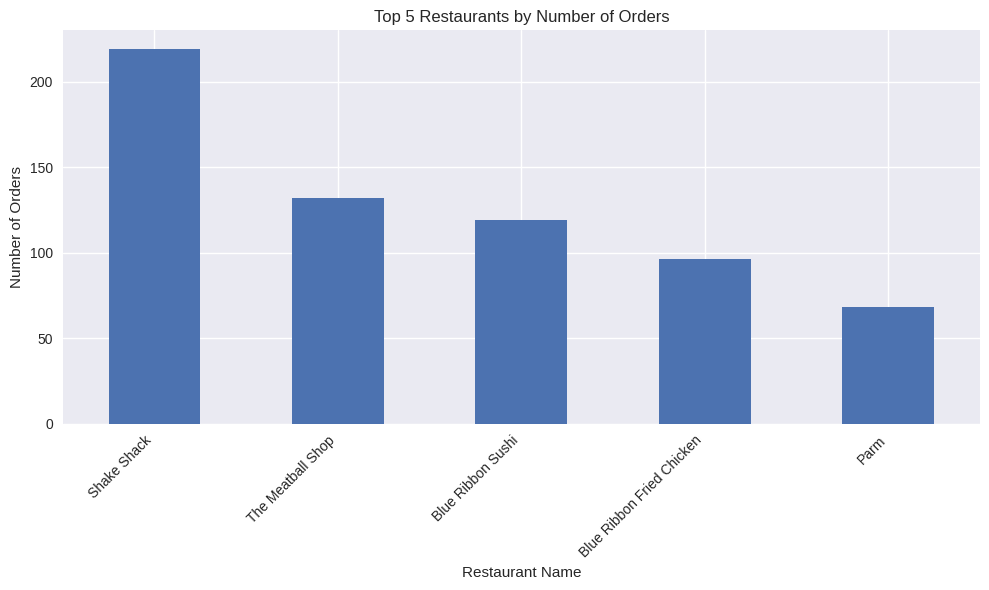

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [23]:
# Display and list the top five restaurants
top_five_rest = df['restaurant_name'].value_counts().head(5)  # Get top 5 restaurants by order count

# Create the plot (bar plot)
plt.figure(figsize=(10, 6))  # Create a new figure of size 10x6 inches
top_five_rest.plot(kind='bar')  # Plot top 5 restaurants as bar chart
plt.title('Top 5 Restaurants by Number of Orders')  # Set title
plt.xlabel('Restaurant Name')  # x-axis label
plt.ylabel('Number of Orders')  # y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Print top 5 restaurants
print(top_five_rest)

#### Observations:
- Shake Shack is the most popular restaurant, with significantly more orders when compared to the others
- Blue Ribbon Fried Chicken is the second most popular, but with notably fewer orders than Shake Shack
- The top 5 restaurants are dominated by American cuisine (Shake Shack, Blue Ribbon Fried Chicken, The Meatball Shop)
- There's a clear drop-off in order numbers from the most popular to the fifth most popular restaurant
- The popularity of these restaurants could be due to factors like food quality, price, or location
- The difference in order volumes might indicate varying customer preferences or restaurant capacities

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

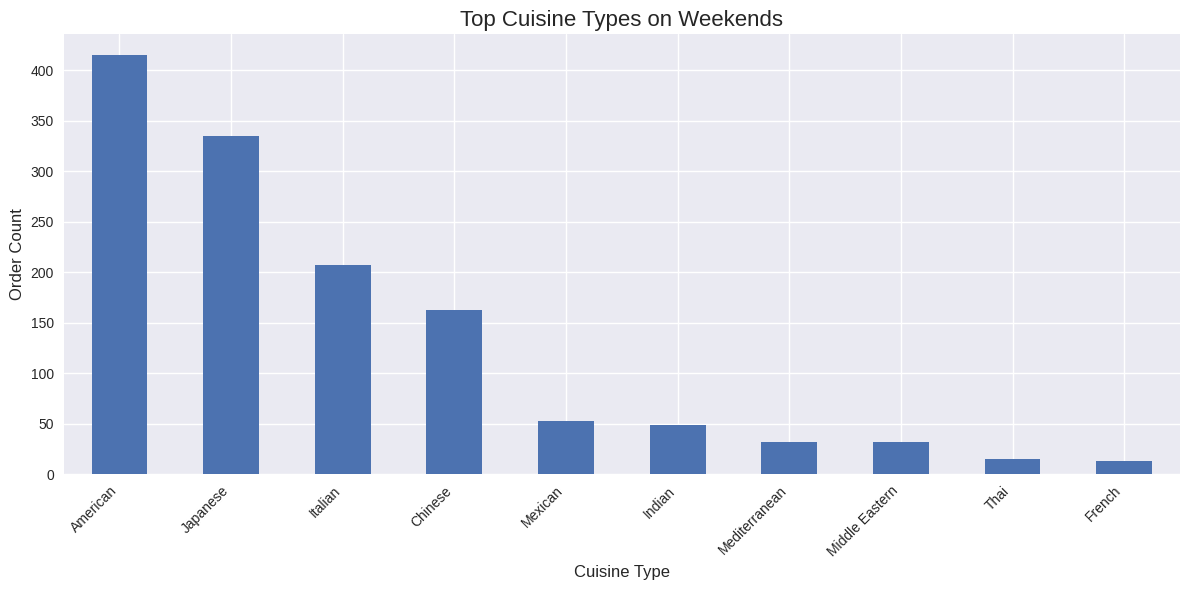

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Name: count, dtype: int64


In [24]:
# Weekend Cuisine Analysis
# Filter the data to only include weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Get the count of orders for each cuisine type on weekends
weekend_cuisine_counts = weekend_orders['cuisine_type'].value_counts()

# Plot the top cuisine types
plt.figure(figsize=(12, 6))  # Create a new figure with size 12x6 inches
weekend_cuisine_counts.head(10).plot(kind='bar')  # Plot top 10 cuisines as a bar chart
plt.title('Top Cuisine Types on Weekends', fontsize=16)  # Set title with larger font
plt.xlabel('Cuisine Type', fontsize=12)  # x-axis label
plt.ylabel('Order Count', fontsize=12)  # y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()  # Display the plot

print(weekend_cuisine_counts.head(10))  # Print top 10 weekend cuisines


#### Observations:
- Restaurants could use this information to adjust their weekend menus, promotions or staffing levels
- Foodhub could target promotions for the most popular weekend cuisines
- The data might indicate different customer preferences or behaviors on weekends vs. weekdays
- The variety of cuisines in the top 10 shows the diverse food preferences of weekend customers
- This weekend data could be compared with weekday data to identify any significant shifts in cuisine popularity
  - We'll review this below (Weekday vs Weekend Delivery Time Analysis)

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

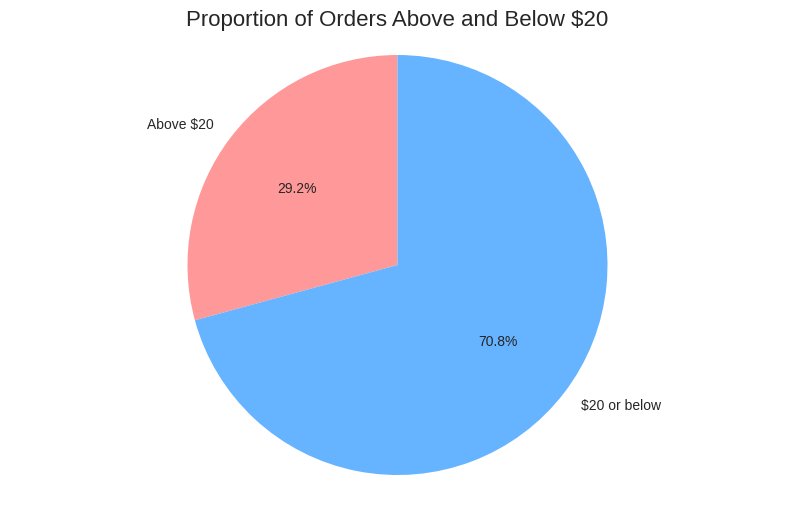

Percentage of orders above $20: 29.24%


In [25]:
# Order Cost Analysis
# Calculate the percentage of orders above $20
orders_above_20 = (df['cost_of_the_order'] > 20).mean() * 100
orders_below_20 = 100 - orders_above_20

# Create a pie chart
plt.figure(figsize=(10, 6))  # Create a new figure
plt.pie([orders_above_20, orders_below_20], labels=['Above $20', '$20 or below'],
        autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])  # Create pie chart
plt.title('Proportion of Orders Above and Below $20', fontsize=16)  # Set title
plt.axis('equal')  # Ensure pie chart is circular
plt.show()  # Display the plot

# Print the exact percentage
print(f"Percentage of orders above $20: {orders_above_20:.2f}%")

#### Observations:
- A significant portion of orders cost more than \$20
 - May be indicitave of a market for higher-priced meals
- The majority of orders are below \$20
  - May be indicitave of preference for more affordable options
- This price distribution could inform future pricing strategies and menu offerings



### **Question 10**: What is the mean order delivery time? [1 mark]

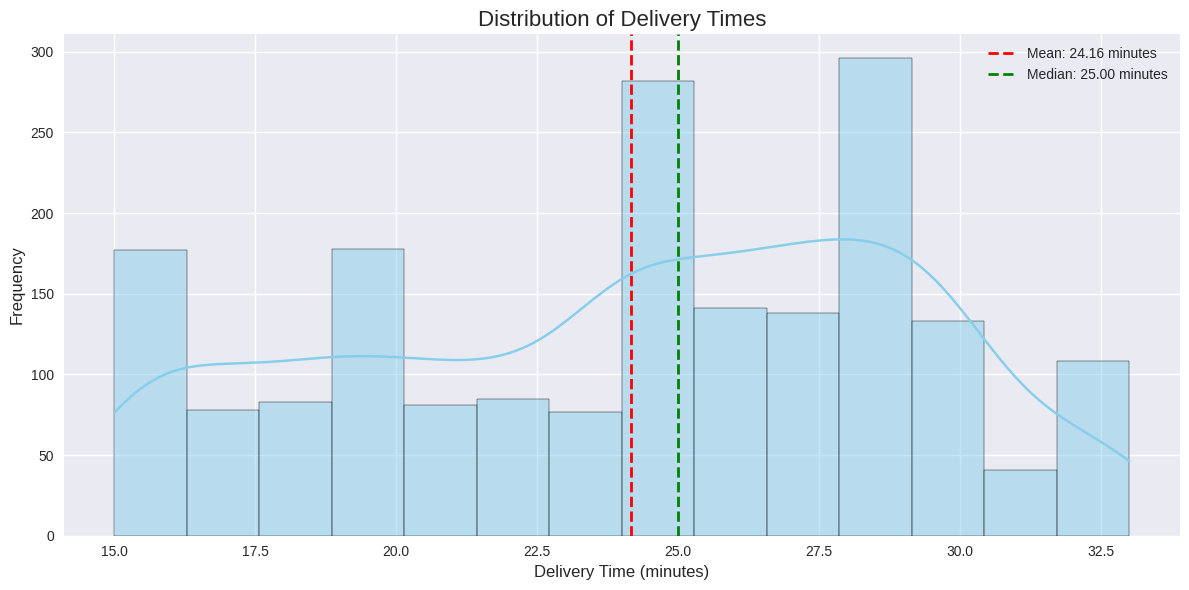

The mean order delivery time is 24.16 minutes.


In [26]:
# Delivery Time Analysis
# Calculate the mean and median delivery time
mean_delivery_time = df['delivery_time'].mean()
median_delivery_time = df['delivery_time'].median()

# Create a histogram of delivery times with KDE
plt.figure(figsize=(12, 6))  # Create a new figure
sns.histplot(df['delivery_time'], kde=True, color='skyblue')  # Plot histogram with KDE

# Add vertical lines for mean and median
plt.axvline(mean_delivery_time, color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {mean_delivery_time:.2f} minutes')
plt.axvline(median_delivery_time, color='green', linestyle='dashed', linewidth=2,
            label=f'Median: {median_delivery_time:.2f} minutes')

# Configure the plot
plt.title('Distribution of Delivery Times', fontsize=16)  # Set title
plt.xlabel('Delivery Time (minutes)', fontsize=12)  # x-axis label
plt.ylabel('Frequency', fontsize=12)  # y-axis label
plt.legend(fontsize=10)  # Add legend
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Print the mean delivery time
print(f"The mean order delivery time is {mean_delivery_time:.2f} minutes.")

#### Observations:
- The mean delivery time of 24.16 minutes provides a service delivery benchmark (like SLA)
- The distribution of delivery times appears to be roughly normal, with some slight left-skew (mean < median)
- Given the distribution, customers could be informed that most deliveries take between 20-30 minutes
- There is scope for reviewing deliveries that reside above the 30 minute mark in terms of improving operational efficiency




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

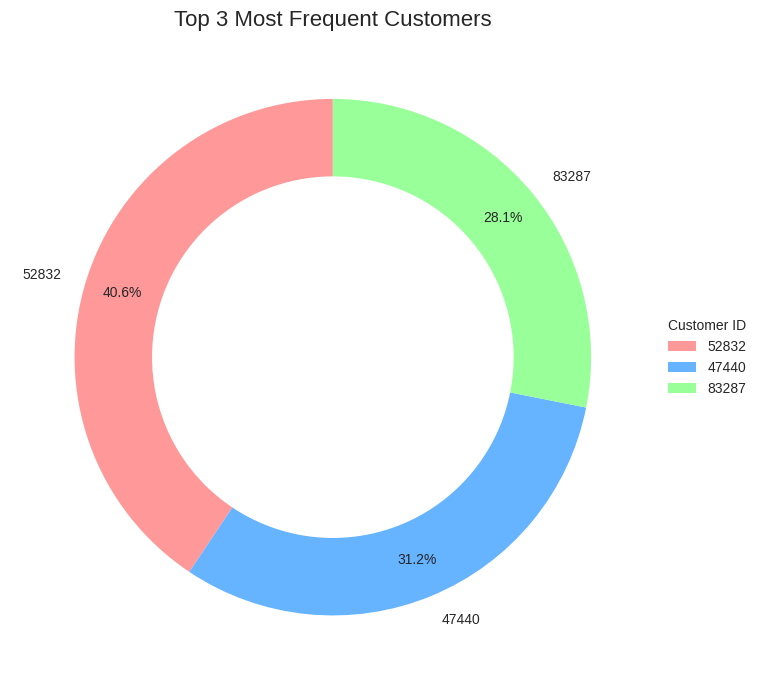

Top 3 most frequent customers:
Customer ID: 52832, Number of orders: 13
Customer ID: 47440, Number of orders: 10
Customer ID: 83287, Number of orders: 9


In [27]:
# Top Customers Analysis
# Get the count of orders per customer
order_counts = df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)

# Get the top 3 most frequent customers
top_customers = order_counts.head(3)

# Create a donut chart
plt.figure(figsize=(10, 7))  # Create a new figure
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Define colors for the chart
plt.pie(top_customers.values, labels=top_customers.index, autopct='%1.1f%%', colors=colors,
        startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.5))  # Create donut chart
plt.title("Top 3 Most Frequent Customers", fontsize=16)  # Set title

# Add a circle at the center to create a donut chart
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add legend
plt.legend(title="Customer ID", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Print top 3 customers details
print("Top 3 most frequent customers:")
for customer_id, order_count in top_customers.items():
    print(f"Customer ID: {customer_id}, Number of orders: {order_count}")

#### Observations:
- The top three customers indicate a presence of notable loyaly to the Foodhub service.
 - This may be an opportunity for more targeted marketing towards this segment of the customer base.
- There is scope for further analysis towards this segment to establish factors that contribute to the high amount of orders / repeat orders.
 - Try to replicate these factors occross the wider customer base.




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


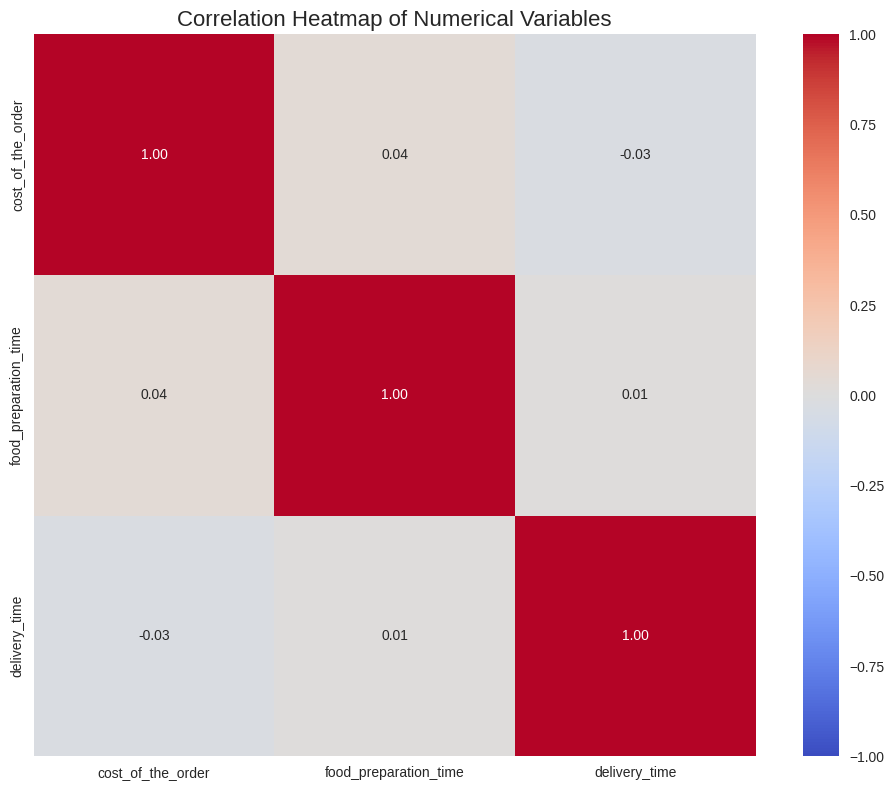

In [28]:
# Correlation Heatmap for Numerical Variables
def plot_corr_heatmap(df):
    # Select numerical columns for correlation analysis
    numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

    # Calculate the correlation matrix
    corr = df[numerical_cols].corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Create the heatmap using seaborn
    sns.heatmap(corr,
                annot=True,  # Show the correlation values in each cell
                cmap='coolwarm',  # Use a diverging colormap
                vmin=-1, vmax=1, center=0,  # Set the color scale
                square=True,  # Make sure the cells are square
                fmt='.2f')  # Format the correlation values to 2 decimal places

    # Set the title of the heatmap
    plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)

    # Adjust the layout to prevent cutting off labels
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the function to create the heatmap
plot_corr_heatmap(df)

###Observations
The most obvious observation is that there are very weak correlations between all pairs of variables above. This may be indicitave that these factors (cost, preparation time, and delivery time) are largely independent of each other in this dataset.

- `customer_id` and `order_id` numerical variables have been omitted as they don't have a bearing on the overall analysis within this context
- `Cost` and `Food Preparation Time` (0.04): There's a very slight positive correlation between the cost of the order and food preparation time.
  - May suggest that more expensive orders take slightly longer to prepare, but the relationship is fairly weak and likely negligible
- `Food Preparation Time and Delivery Time` (0.01): The correlation between food preparation time and delivery time is essentially zero.
  - This suggests that the time taken to prepare food doesn't impact the delivery time, or vice versa
  - Processes appear to be independent of one other
- `Cost and Delivery Time` (-0.03): There's a very slight negative correlation between the cost of the order and delivery time
  - This could potentially indicate that higher-priced orders might have slightly faster delivery times
  - The correlation is so weak that it's practically meaningless



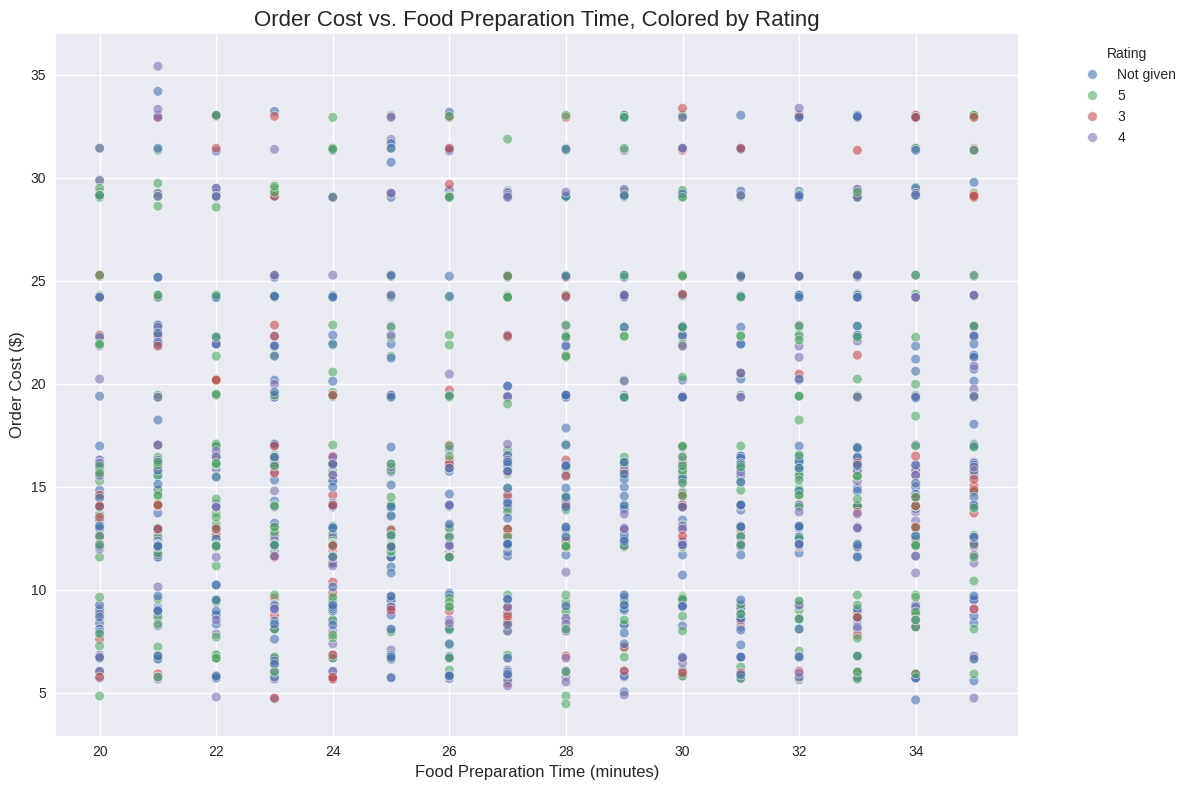

Correlation between order cost and food preparation time: 0.04

Average order cost by rating:
rating
5           17
4           17
3           16
Not given   16
Name: cost_of_the_order, dtype: float64

Average preparation time by rating:
rating
3           27
4           27
Not given   27
5           27
Name: food_preparation_time, dtype: float64


In [29]:
# Order Cost vs.Food Preparation Time Coloured by Rating
def plot_cost_vs_prep_time(df):
    plt.figure(figsize=(12, 8))  # Create a new figure of size 12x8 inches
    sns.scatterplot(data=df, x='food_preparation_time', y='cost_of_the_order',
                    hue='rating', alpha=0.6)  # Create scatter plot

    plt.title('Order Cost vs. Food Preparation Time, Colored by Rating', fontsize=16)  # Set title
    plt.xlabel('Food Preparation Time (minutes)', fontsize=12)  # x-axis label
    plt.ylabel('Order Cost ($)', fontsize=12)  # y-axis label
    plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot

    # Calculate and print correlation
    correlation = df['cost_of_the_order'].corr(df['food_preparation_time'])
    print(f"Correlation between order cost and food preparation time: {correlation:.2f}")

    # Calculate and print average cost by rating
    avg_cost_by_rating = df.groupby('rating')['cost_of_the_order'].mean().sort_values(ascending=False)
    print("\nAverage order cost by rating:")
    print(avg_cost_by_rating)

    # Calculate and print average preparation time by rating
    avg_prep_time_by_rating = df.groupby('rating')['food_preparation_time'].mean().sort_values(ascending=False)
    print("\nAverage preparation time by rating:")
    print(avg_prep_time_by_rating)

# Call the function
plot_cost_vs_prep_time(df)

###Observations
- The scatter plot shows no clear linear relationship between order cost and food preparation time
  - This suggests that more expensive orders don't necessarily take longer to prepare, and quick-to-prepare items aren't always cheaper
- The order costs range from about \$5 to \$35, with a dense concentration between \$10 and \$25
  - This indicates a diverse menu with options at various price points, catering to different customer budgets and preferences
- The color coding for ratings shows a mix of ratings across all price points and preparation times. To further pad this out:
  - There doesn't seem to be a clear pattern where higher-priced or longer-preparation items consistently receive better ratings
  - A significant number of orders are marked as "Not given" (grey dots), showing that many customers don't provide ratings
  - The presence of high ratings (4 and 5) across various price points and preparation times indicates that customer satisfaction isn't solely determined by these factors


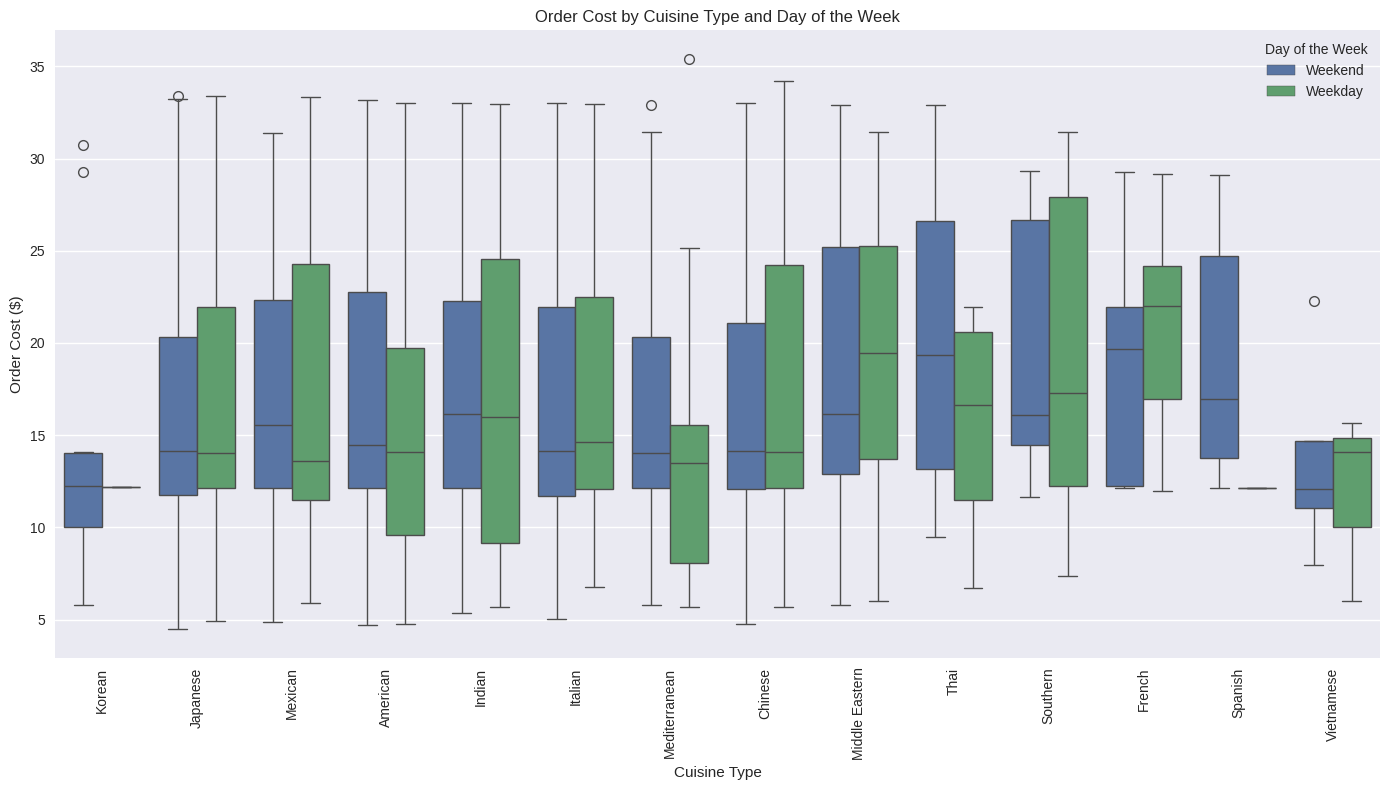

In [30]:
# Box Plot: Order Cost by Cuisine Type and Day of the Week
def plot_cost_by_cuisine_and_day(df):
    plt.figure(figsize=(14, 8))  # Create a new figure
    sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week')  # Create box plot. x-axis is 'cuisine_type' and y-axis is 'cost_of_the_order'. Coloured / segmented by 'day_of_the_week'
    plt.title('Order Cost by Cuisine Type and Day of the Week')  # Set title
    plt.xlabel('Cuisine Type')  # x-axis label
    plt.ylabel('Order Cost ($)')  # y-axis label
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.legend(title='Day of the Week')  # Add legend
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot

plot_cost_by_cuisine_and_day(df)  # Call the function

###Observations
- There's notable variation in order costs across different cuisine types
  - Indian cuisine appears to have a high median cost and a wide enough range, suggesting it's generally more expensive and has more diverse pricing
  - On the other end of the scale, Vietnamese cuisine appears to have a low median cost and a narrow range, indicating more consistent, lower pricing
- For most cuisine types, there's a notable difference in order costs between weekends and weekdays
  - Many cuisines, such as like Mexican, and Thai, show higher median costs on weekends when compared with weekdays
  - May be indicitave that people tend to spend more on dining during weekends, possibly opting for more expensive meals or larger orders
- Several cuisine types, such as Japanese, Mediterranean, and Vietnamese, show several outliers on the higher end of the price range
  - These are more prominent for weekend orders, suggesting that some customers are willing to endulge on expensive meals, especially during weekends
  - This presents an opportunity for premium offerings in these cuisines  
- Some cuisines, like Korean and Vietnamese, show relatively consistent pricing between weekdays and weekends
  - May be indicitave that these cuisines have more consistent pricing or that customer ordering behaviour doesn't fluctuate irrespective of the time of the week

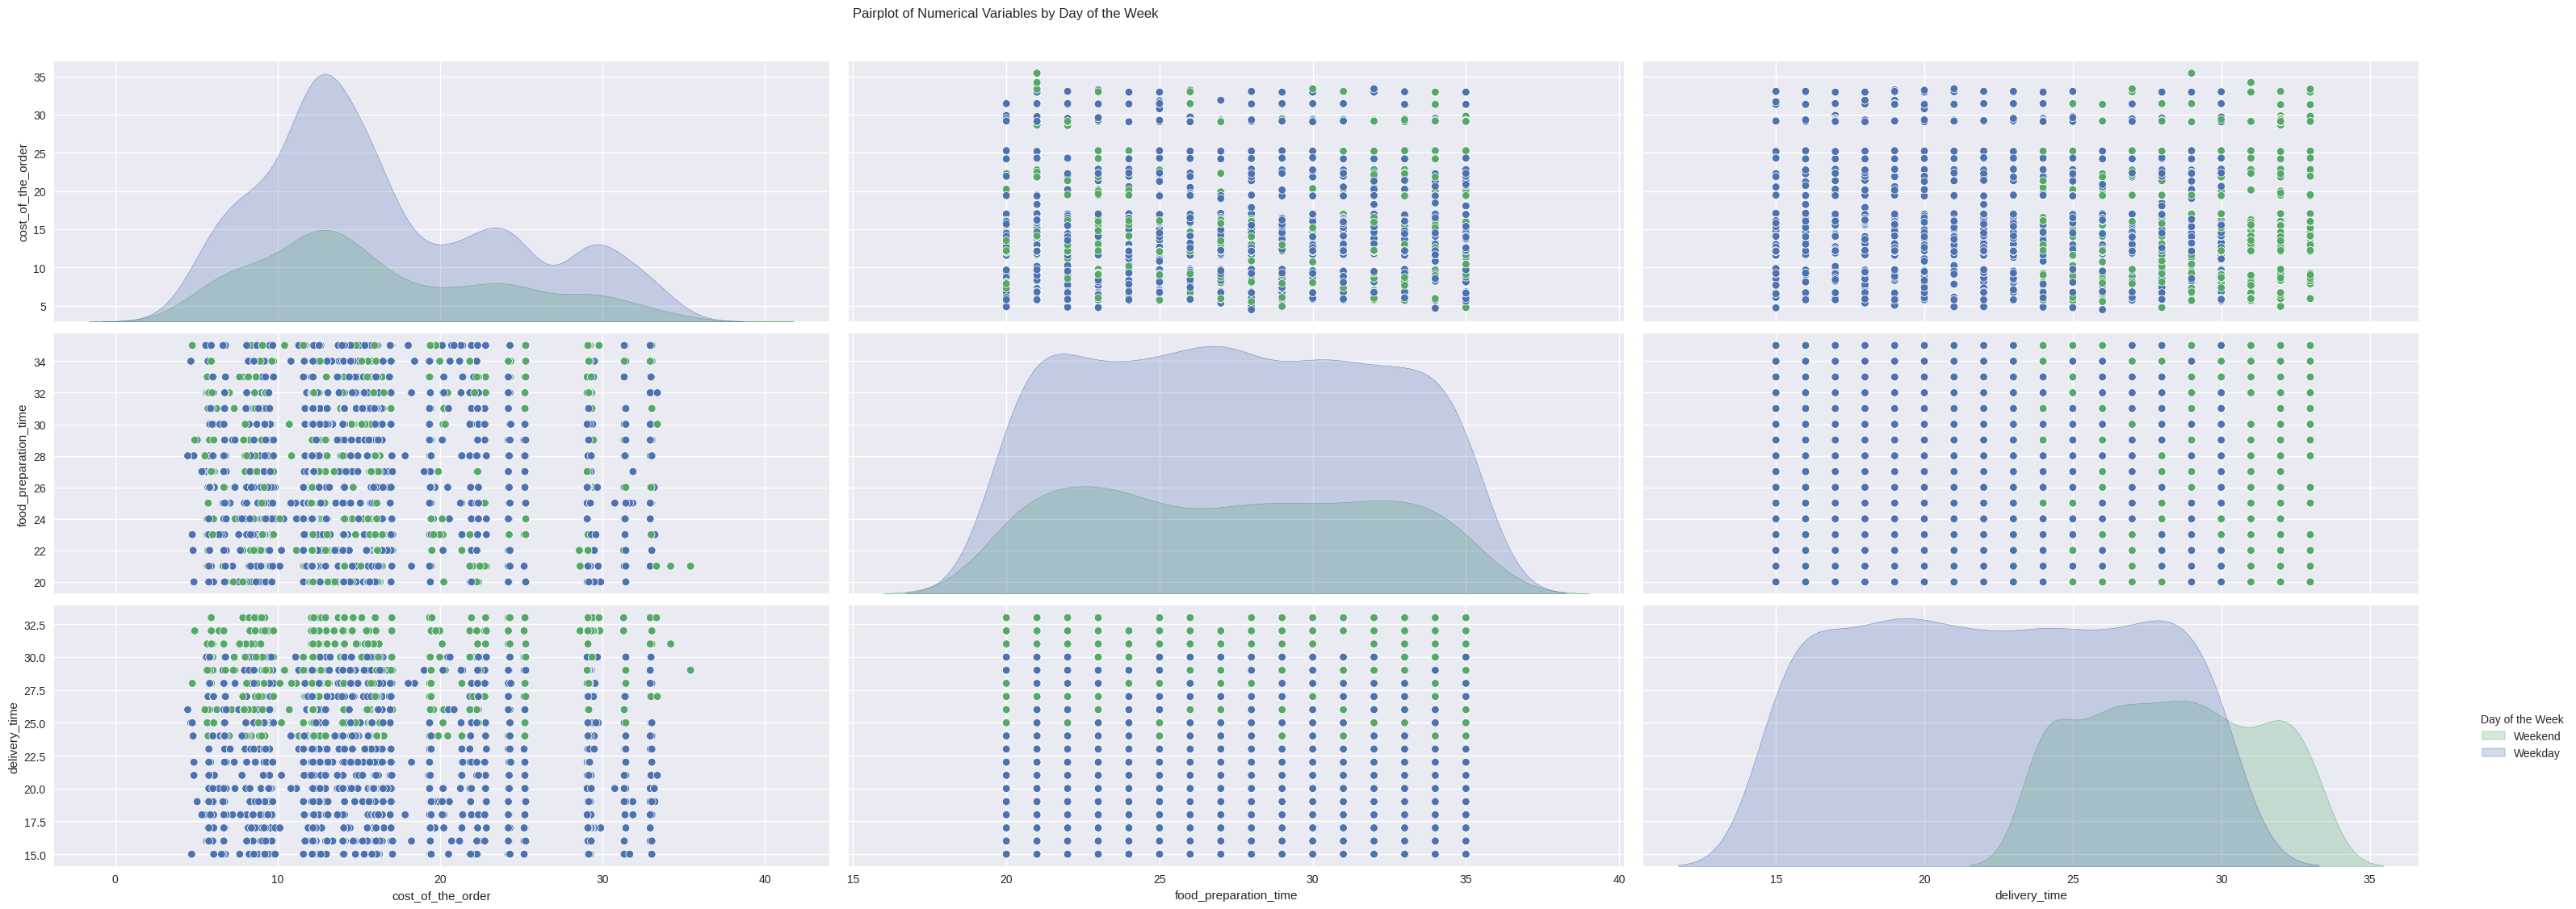

In [32]:
# Pairplot of Numerical Variables, coloured by Day of the Week
def plot_pairplot(df):
    numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time'] # Define the numerical columns we want to include in the pairplot
    # Create the pairplot using seaborn
    x = sns.pairplot(df[numerical_cols + ['day_of_the_week']],
                     hue='day_of_the_week',  # Color points based on day of the week
                     height=3,  # Set the height of each subplot
                     aspect=1.2)  # Set the aspect ratio of each subplot
    plt.suptitle('Pairplot of Numerical Variables by Day of the Week', y=1.02) # Add a super title to the entire figure
    x._legend.remove() # Remove the original legend created by seaborn
    # Create a new legend
    plt.legend(title='Day of the Week',
               loc='center right',
               bbox_to_anchor=(1.2, 0.5),
               labels=['Weekend', 'Weekday'])

    x.fig.set_size_inches(25, 11) # Increase figure size to accommodate the legend
    x.fig.tight_layout() # Adjust the layout to fit everything
    x.fig.subplots_adjust(right=1.2) # Adjust the right margin to make room for the legend
    plt.show() # Display the plot

# Call the function to create the pairplot
plot_pairplot(df)

###Observations
- Weekend orders tend to be slightly more expensive and have longer delivery times compared to weekday orders
- There's a positive correlation between order cost and preparation time (albeit weak), suggesting more complex or larger orders may take longer to prepare and cost more
- The distributions of preparation and delivery times are relatively consistent between weekdays and weekends, indicating stable operational processes
- The right-skewed nature of the cost distribution indicates that while most orders are in a lower price range, there are some high-value outliers that could be worth investigating

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

Restaurants eligible for the promotional offer:
          restaurant_name  rating_count  average_rating
        The Meatball Shop            84            4.51
Blue Ribbon Fried Chicken            64            4.33
              Shake Shack           133            4.28
        Blue Ribbon Sushi            73            4.22

Total number of eligible restaurants: 4


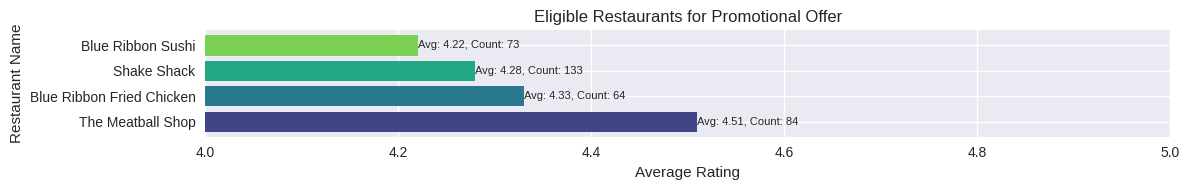

In [34]:
# Promotional Offer Analysis
def analyse_promo_offer(df):
    # Convert 'rating' to numeric, treating 'Not given' as NaN
    # This allows us to perform mathematical operations on the ratings
    df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

    # Group by restaurant and calculate rating count and average
    # We're getting both the count of ratings and the mean rating for each restaurant
    restaurant_ratings = df.groupby('restaurant_name').agg({
        'rating_numeric': ['count', 'mean']
    }).reset_index()

    # Flatten column names for easier access
    restaurant_ratings.columns = ['restaurant_name', 'rating_count', 'average_rating']

    # Filter restaurants meeting the criteria:
    # More than 50 ratings and average rating greater than 4
    eligible_restaurants = restaurant_ratings[
        (restaurant_ratings['rating_count'] > 50) &
        (restaurant_ratings['average_rating'] > 4)
    ]

    # Sort eligible restaurants by average rating in descending order
    eligible_restaurants = eligible_restaurants.sort_values('average_rating', ascending=False)
    eligible_restaurants['average_rating'] = eligible_restaurants['average_rating'].round(2)

    # Print the results
    print("Restaurants eligible for the promotional offer:")
    print(eligible_restaurants.to_string(index=False, float_format='{:.2f}'.format))
    print(f"\nTotal number of eligible restaurants: {len(eligible_restaurants)}")

    # Create a visualization of eligible restaurants
    # Adjust figure size based on the number of eligible restaurants
    plt.figure(figsize=(12, len(eligible_restaurants) * 0.5))

    # Create horizontal bar chart
    # Each bar represents a restaurant, with length corresponding to average rating
    bars = plt.barh(eligible_restaurants['restaurant_name'], eligible_restaurants['average_rating'],
                    color=sns.color_palette("viridis", len(eligible_restaurants)))

    # Add labels on the bars
    # Each label shows the average rating and the count of ratings
    for i, (bar, count) in enumerate(zip(bars, eligible_restaurants['rating_count'])):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'Avg: {bar.get_width():.2f}, Count: {count}',
                 va='center', ha='left', fontsize=8)

    # Set chart title and labels
    plt.title('Eligible Restaurants for Promotional Offer')
    plt.xlabel('Average Rating')
    plt.ylabel('Restaurant Name')

    # Set x-axis limits from 4 to 5 for better visibility of differences
    # Since all eligible restaurants have ratings > 4
    plt.xlim(4, 5)

    # Adjust layout to prevent cutting off labels
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Return the dataframe of eligible restaurants for further use if needed
    return eligible_restaurants

# Run the analysis
eligible_restaurants = analyse_promo_offer(df)

###Observations:
- Only four restaurants met the criteria for the promotional offer (over 50 ratings and an average rating above 4).
  - May be indicitave of the criteria being quite strict, highlighting *only* the top performers on FoodHub.
- The Meatball Shop stands out with the highest average rating
  - This indicates that while all four restaurants plotted above maintain high quality, The Meatball Shop has achieved exceptional customer satisfaction.
- Blue Ribbon appears twice in the list (Blue Ribbon Fried Chicken and Blue Ribbon Sushi).
  - Indicating that this brand consistently delivers high-quality service across different cuisine types.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

Net revenue generated by the company: $6166.30

Observations:
1. 29.2% of orders are above $20, contributing 59.8% of the total revenue.
2. 70.3% of orders are between $5 and $20, contributing 40.2% of the total revenue.
3. The remaining 0.5% of orders are $5 or less, generating no commission.


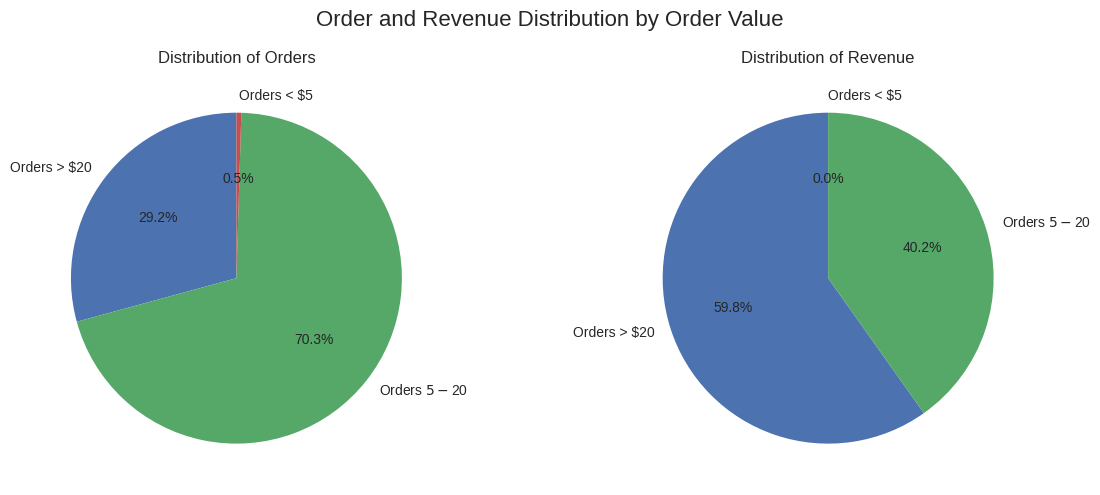

In [35]:
def calculate_net_rev(df):
    # Define a function to calculate commission
    def get_commission(cost):
        if cost > 20:
            return cost * 0.25  # 25% commission for orders above $20
        elif cost > 5:
            return cost * 0.15  # 15% commission for orders between $5 and $20
        else:
            return 0  # No commission for orders $5 or less

    # Apply commission calculation to each order
    df['commission'] = df['cost_of_the_order'].apply(get_commission)

    # Calculate total revenue
    total_revenue = df['commission'].sum()

    # Categorise orders
    orders_above_20 = df[df['cost_of_the_order'] > 20]
    orders_5_to_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]

    # Calculate percentages of orders in each category
    percent_above_20 = len(orders_above_20) / len(df) * 100
    percent_5_to_20 = len(orders_5_to_20) / len(df) * 100

    # Calculate revenue from each category
    revenue_above_20 = orders_above_20['commission'].sum()
    revenue_5_to_20 = orders_5_to_20['commission'].sum()

    # Calculate percentage of revenue from each category
    percent_revenue_above_20 = revenue_above_20 / total_revenue * 100
    percent_revenue_5_to_20 = revenue_5_to_20 / total_revenue * 100

    # Return results
    results = {
        "total_revenue": total_revenue,
        "percent_orders_above_20": percent_above_20,
        "percent_orders_5_to_20": percent_5_to_20,
        "percent_revenue_above_20": percent_revenue_above_20,
        "percent_revenue_5_to_20": percent_revenue_5_to_20
    }

    return results

# Function to enable the visualistion of the data returned by 'results' above
def visualise_rev_dist(results):
    # Prepare data for visualisation
    categories = ['Orders > $20', 'Orders $5-$20', 'Orders < $5']
    order_pct = [results['percent_orders_above_20'],
                         results['percent_orders_5_to_20'],
                         100 - results['percent_orders_above_20'] - results['percent_orders_5_to_20']]
    revenue_pct = [results['percent_revenue_above_20'],
                           results['percent_revenue_5_to_20'],
                           0]  # No revenue from orders < $5

    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot order distribution
    ax1.pie(order_pct, labels=categories, autopct='%1.1f%%', startangle=90)
    ax1.set_title('Distribution of Orders')

    # Plot revenue distribution
    ax2.pie(revenue_pct, labels=categories, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Distribution of Revenue')

    plt.suptitle('Order and Revenue Distribution by Order Value', fontsize=16)
    plt.tight_layout()
    plt.show()

# Calculate results
results = calculate_net_rev(df)

# Print the total commission result
print(f"Net revenue generated by the company: ${results['total_revenue']:.2f}")

# Print some observations
print("\nObservations:")
print(f"1. {results['percent_orders_above_20']:.1f}% of orders are above $20, contributing {results['percent_revenue_above_20']:.1f}% of the total revenue.")
print(f"2. {results['percent_orders_5_to_20']:.1f}% of orders are between $5 and $20, contributing {results['percent_revenue_5_to_20']:.1f}% of the total revenue.")
print(f"3. The remaining {100 - results['percent_orders_above_20'] - results['percent_orders_5_to_20']:.1f}% of orders are $5 or less, generating no commission.")

# Plot the results
visualise_rev_dist(results)

#### Observations:
- 29.2% of orders are above \$20, contributing 59.8% of the total revenue
  - Introduce a tiered loyalty program that encourages rewards for high value orders.
  - This could potentially convert some smaller orders past the \$20 threshold (thus inceasing overall revenue)
- 70.3% of orders are between \$5 and \$20, contributing 40.2% of the total revenue
  - Introduce strategic upselling techniques within the Foodhub app
  - Personalised recommendations based on order history
- The remaining 0.5% of orders are \$5 or less, generating no commission
  - Introduce a minimum order value greater than \$5 or introduce a small order fee for orders under \$5.
  - This would eliminate no-commission orders all together.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

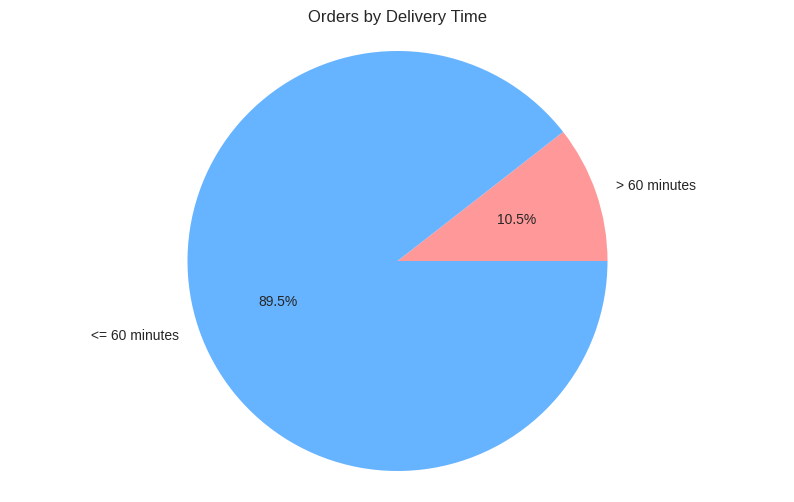

10.54% of orders take more than 60 minutes to get delivered.

Observations:
1. The average total time for order completion is 51.53 minutes.
2. The median total time is 52.00 minutes, suggesting a relatively symmetric distribution.
3. The longest order time is 68.00 minutes, which might indicate exceptional cases or potential areas for operational improvement.


In [36]:
# Total Delivery Time Analysis
def analyse_total_del_time(df):
    # Calculate total time (preparation + delivery)
    df['total_time'] = df['food_preparation_time'] + df['delivery_time']

    # Calculate percentage of orders taking more than 60 minutes
    orders_over_60 = (df['total_time'] > 60).mean() * 100

    # Create a pie chart
    plt.figure(figsize=(10, 6))  # Create a new figure of size 10x6 inches
    plt.pie([orders_over_60, 100 - orders_over_60], labels=['> 60 minutes', '<= 60 minutes'],
            autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])  # Create pie chart
    plt.title('Orders by Delivery Time')  # Set title
    plt.axis('equal')  # Ensure pie is circular
    plt.show()  # Display the plot

    return orders_over_60

# Calculate results
pct_over_60 = analyse_total_del_time(df)

print(f"{pct_over_60:.2f}% of orders take more than 60 minutes to get delivered.")

# Calculate average, median and max delivery times
average_time = df['total_time'].mean()
median_time = df['total_time'].median()
max_time = df['total_time'].max()

print(f"\nObservations:")
print(f"1. The average total time for order completion is {average_time:.2f} minutes.")
print(f"2. The median total time is {median_time:.2f} minutes, suggesting {'a skew towards longer delivery times' if median_time < average_time else 'a relatively symmetric distribution'}.")
print(f"3. The longest order time is {max_time:.2f} minutes, which might indicate exceptional cases or potential areas for operational improvement.")


#### Observations:
- Time Distribution: The percentage of orders taking more than 60 minutes (10.54%) gives us a good idea of how many orders exceed what might be considered a standard delivery time.
  - This can be useful when defining KPI's for customer satisfaction and operational efficiency
- Average vs. Median Time: if we compare the average and median total times, we can observe the distribution of delivery times
  -  If the median is lower than the average, it can suggest that most orders are delivered on the quick end of the scale however, there are some outliers with quite long delivery times that are pulling that average up.
- Maximum Delivery Time: The longest order time provides insights into extreme cases.
 - This may represent orders during peak times, orders to distant locations, or potentially an indicator of staffing issues at particular times of the week

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

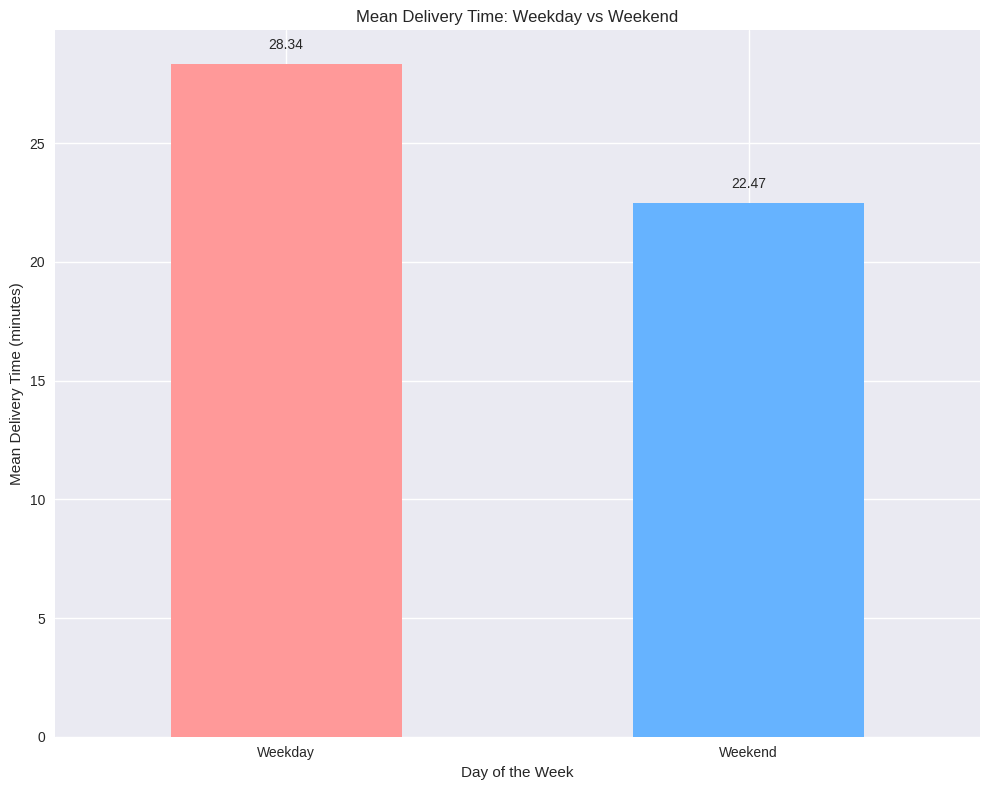

Mean Delivery Times:
day_of_the_week
Weekday   28
Weekend   22
Name: delivery_time, dtype: float64

Observations:
1. The weekday has a longer mean delivery time by 5.87 minutes.
2. This represents a 26.12% increase in delivery time during weekdays.
3. Factors such as traffic patterns, order volume, or staffing levels might contribute to this difference.


In [37]:
# Weekday vs Weekend Delivery Time Analysis
def analyse_weekday_weekend_del(df):
    # Group by day type and calculate mean delivery time
    mean_delivery_times = df.groupby('day_of_the_week')['delivery_time'].mean()

    # Create a bar chart
    plt.figure(figsize=(10, 8))  # Create a new figure of size 10x8 inches
    mean_delivery_times.plot(kind='bar', color=['#ff9999', '#66b3ff'])  # Create bar plot based mean
    plt.title('Mean Delivery Time: Weekday vs Weekend')  # Set title
    plt.xlabel('Day of the Week')  # x-axis label
    plt.ylabel('Mean Delivery Time (minutes)')  # y-axis label
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal
    for i, v in enumerate(mean_delivery_times):
        plt.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')  # Add value labels on bars
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot

    return mean_delivery_times

# Calculate Results
mean_delivery_times = analyse_weekday_weekend_del(df)

print("Mean Delivery Times:")
print(mean_delivery_times)

# Calculate the difference
time_difference = abs(mean_delivery_times['Weekend'] - mean_delivery_times['Weekday'])

print(f"\nObservations:")
print(f"1. The {'weekend' if mean_delivery_times['Weekend'] > mean_delivery_times['Weekday'] else 'weekday'} "
      f"has a longer mean delivery time by {time_difference:.2f} minutes.")
print(f"2. This represents a {(time_difference / mean_delivery_times.min()) * 100:.2f}% increase in delivery time "
      f"during {'weekends' if mean_delivery_times['Weekend'] > mean_delivery_times['Weekday'] else 'weekdays'}.")
print(f"3. Factors such as traffic patterns, order volume, or staffing levels might contribute to this difference.")

#### Observations:
- It may be worthwhile adjust staffing levels based on the day / time of the week.
- Set more accurate or attainable delivery time expectations for customers depending on whether it's a weekday or weekend.
- Review the reasons behind the differences to potentially improve efficiency during busier periods.
  - Better resource allocation, for example.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- Order Patterns:
  - There's a significant difference in order volumes between weekends (68.5%) and weekdays (31.5%).
  - Weekend orders tend to be slightly more expensive and have longer delivery times.
- Revenue Distribution:
  - 29.2% of orders (those above \$20) contribute 59.8% of the total revenue.
  - 70.3% of orders (between \$5 and \$20) contribute 40.2% of the revenue.
  - 0.5% of orders (\$5 or less) generate no commission.
- Cuisine and Ratings:
  - American, Japanese, and Italian cuisines are the most popular.
  - Higher-rated orders tend to have shorter delivery times.
  - There's a slight positive correlation between order cost and preparation time.
- Delivery Performance:
  - The average delivery time shows some variation between weekdays and weekends.
  - There's a weak positive correlation between order cost and delivery time.

### Recommendations:

- A focus on Promotional offers:
  - Offer weekday lunch specials to boost order volumes during slower periods.
  - Create bundle deals for popular cuisine types (American, Japanese, Italian) to increase average order value.
- Operational Efficiency:
  - Optimise staffing levels for weekends to handle increased order volumes and potentially longer preparation / delivery times.
  - Review and remediate factors causing longer weekend delivery times (e.g., traffic, restaurant capacity).
- Customer Engagement and Loyalty:
  - Design a tiered loyalty program that offers increasing rewards for high-value orders and frequent customers.
  - Use personalised recommendations based on food preferences and order history to encourage larger orders.
- Commission Structure and Minimum Order Value:
  - Consider adjusting the commission structure to encourage restaurants to promote higher-value orders.
  - Implement a minimum order value greater than \$5 or introduce a small order fee for orders under \$5 to ensure all orders generate some revenue.
- Data-Driven Decision Making:
  - Regularly review order patterns, cuisine preferences, and delivery performance to provide currenrt insights and to model future strategy.
  - Use predictive modeling to anticipate demand fluctuations and optimise resource allocation.


---

In [40]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Applied Data Science Program/Main Modules/Foundations - Python and Statistics/Week 2 - Foundations - Statistics/FoodHub Project/Final_MQ_FDS_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Applied Data Science Program/Main Modules/Foundations - Python and Statistics/Week 2 - Foundations - Statistics/FoodHub Project/Final_MQ_FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 2971806 bytes to /content/drive/MyDrive/Applied Data Science Program/Main Modules/Foundations - Python and Statistics/Week 2 - Foundations - Statistics/FoodHub Project/Final_MQ_FDS_Project_LearnerNotebook_FullCode.html
